# A) Catégorisation des articles du magazine Québec Science en sces humaines ou sces naturelles

In [226]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [227]:
# création d'une liste des noms des colonnes d'intérêt à extraire du fichier csv
# list of columns to be extracted from Excel table

liste_col = ['numéro', 'mots_clefs', 'catégorie']

In [228]:
# importation des 3 colonnes d'intérêt du fichier 'qs_sans_dossiers_500.csv'
# les 500 premiers articles ont été catégorisés manuellement : 'naturelles' ou 'humaines'

# uploading 3 columns of interest from csv file
# the first 500 rows are articles manually classified as 'humanities' or 'natural' (sciences)

qs = pd.read_csv('qs500.csv', usecols=liste_col)   
qs


,numéro,mots_clefs,catégorie
0,15/07/2023,World Mosquito Program (Projet)\nMoustiques (V...,naturelles
1,15/07/2023,antibiorésistance,naturelles
2,15/07/2023,Limaces -- Québec (Province)\nAnimaux et plan...,naturelles
3,15/07/2023,Insectarium de Montréal. Grand Vivarium\nPapi...,naturelles
4,15/07/2023,Paillettes -- Aspect de l'environnement\nProdu...,naturelles
...,...,...,...
4550,15/07/1979,Kung-fu -- Physique,NaN
4551,15/07/1979,Eau potable\nToxicomanie\nHydrologie\nPollutio...,NaN
4552,15/07/1979,Alcoolisme\nCégeps\nJeunesse québécoise\nTo...,NaN
4553,15/07/1979,Psychiatrie -- Québec (Province),NaN


In [229]:
qs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4555 entries, 0 to 4554
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   numéro      4555 non-null   object
 1   mots_clefs  4555 non-null   object
 2   catégorie   502 non-null    object
dtypes: object(3)
memory usage: 106.9+ KB


In [230]:
# extraction des 500 premières rangées comprenant les articles 
# manuellement catégorisés sciences 'naturelles' ou sciences 'humaines'

# extraction of the first 500 rows that include the articles manually classified as 
# belonging to humanities or natural sciences.

qs_analyse = qs.loc[:501]
# qs_analyse.info()
qs_analyse

,numéro,mots_clefs,catégorie
0,15/07/2023,World Mosquito Program (Projet)\nMoustiques (V...,naturelles
1,15/07/2023,antibiorésistance,naturelles
2,15/07/2023,Limaces -- Québec (Province)\nAnimaux et plan...,naturelles
3,15/07/2023,Insectarium de Montréal. Grand Vivarium\nPapi...,naturelles
4,15/07/2023,Paillettes -- Aspect de l'environnement\nProdu...,naturelles
...,...,...,...
497,15/11/2016,Chimie végétale\nComposés bioactifs végét...,naturelles
498,15/11/2016,"Perreault, Jacques\nSites archéologiques -- G...",humaines
499,15/11/2016,Empirisme\nSciences\nParasciences\nModèles de...,humaines
500,15/11/2016,Obésité -- Étiologie et facteurs de risque\...,humaines


In [231]:
# extraction des catégories des articles déjà classés
# extraction of the classification values of the training data

predictions1 = qs_analyse['catégorie']
predictions1

0      naturelles
1      naturelles
2      naturelles
3      naturelles
4      naturelles
          ...    
497    naturelles
498      humaines
499      humaines
500      humaines
501    naturelles
Name: catégorie, Length: 502, dtype: object

In [232]:
# entraînement de l'algorithme qui apprend à associer les mots-clefs avec leur catégorie.
# algorithm trained on words column using the information in column 'category' as criteria

x, y = qs_analyse.mots_clefs, qs_analyse.catégorie
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)   

In [233]:
# on crée un vocabulaire d'au plus de 1000 mots (max_features) les plus fréquents
# certains de ces mots seronts plus souvent associés aux sciences humaines,
# d'autres aux sciences naturelles; ce qui permettra de catégoriser les paquets de mots-clefs
# associés aux articles.


# a maximum of 1000 words will be used to create the classification vocabulary.
# only the words that will occur at least three times in all the bags of keywords will be taken into account for the construction of the vocabulary
# and the words that occur 70% and more often amongst keywords will be eleminated as irrelevant and not included in the classification vocabulary.

converter = TfidfVectorizer(max_features=1000, min_df=3, max_df=0.7, encoding="utf-8")
converter.fit(x_train)

TfidfVectorizer(max_df=0.7, max_features=1000, min_df=3)

TfidfVectorizer(max_df=0.7, max_features=1000, min_df=3)

In [234]:
# numérisation des mots-clefs qui deviennent leurs fréquences respectives dans le vocabulaire.
# chaque paquet de mots-clefs représentant un article devient une matrice de ces nombres,

# the 'converter' calculates the frequency of each word within the classification vocabulary (max: 1000 words) 
# and maps these frequencies for each word from each 'bag of keywords'.
# the bag of keywords describing an article becomes a list of the probabilities for each keyword.

x_train_converted = converter.transform(x_train)
x_train_converted = converter.transform(x_train).toarray()

In [235]:
# l'algorithme RandomForest crée un maximum de 1000 arbres de classification
# RandomForest will create a maximum of 1000 classification trees.

classifier = RandomForestClassifier(n_estimators=1000, random_state=0, oob_score=True)

classifier.fit(x_train_converted, y_train)

RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=0)

RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=0)

In [236]:
# transformation des mots-clefs mis en réserve pour vérifier l'efficacité de l'algorithme
# transformation of the test kewwords in frequencies.

x_test_converted = converter.transform(x_test).toarray()

In [237]:
# vérification de l'efficacité de l'algorithme
# verification if the algorithm corectly classifies the 'bag of words' of unclassified articles

y_pred = classifier.predict(x_test_converted)

In [238]:
# impression du rapport sur les performances de l'algorithme
# printing of reports on the performance of the algorithm

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    humaines       0.91      0.59      0.71        17
  naturelles       0.82      0.97      0.89        34

    accuracy                           0.84        51
   macro avg       0.87      0.78      0.80        51
weighted avg       0.85      0.84      0.83        51

0.8431372549019608


In [239]:
# extraction des mots-clefs des articles non classés
# extraction of the keywords of the uncategorized articles

qs_non_catégorisés_mots_clefs = qs[502:].mots_clefs

In [240]:
# numérisation des mots-clefs des articles non classés
# conversion of the unclassified bags of keywords into their frequencies for each article

qs_non_catégorisés_mots_clefs_converted = converter.transform(qs_non_catégorisés_mots_clefs).toarray()

In [241]:
# l'algorithme classifie la masse des articles non classés
# algorithm RandonForest is asked to classify the bulk of the articles 

predictions = classifier.predict(qs_non_catégorisés_mots_clefs_converted)
len(predictions)

4053

In [242]:
# tous les articles sont maintenant catégorisés, un petit manuellement, les autres par l'algorithme
# that makes available categorization for all 4555 articles

print(len(predictions1))
print(len(predictions))

502
4053


In [243]:
# fusion en un seul fichier de tous les classements des 4555 articles
# merging of classification data into one column for all 4555 articles.

predictions = np.concatenate([predictions1, predictions])
print(len(predictions))
predictions

4555


array(['naturelles', 'naturelles', 'naturelles', ..., 'naturelles',
       'naturelles', 'naturelles'], dtype=object)

In [244]:
# on ajoute l'information de catégorisation au fichier des 4555 articles
# et on imprime les premiers et derniers articles -- avec leur catégorie -- du fichier
# et on constate les limites de l'algorithme!
# all articles in the original dataframe are classified as 'natural sciences' or 'humanities'

qs['catégorie'] = predictions
qs.info()
qs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4555 entries, 0 to 4554
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   numéro      4555 non-null   object
 1   mots_clefs  4555 non-null   object
 2   catégorie   4555 non-null   object
dtypes: object(3)
memory usage: 106.9+ KB


,numéro,mots_clefs,catégorie
0,15/07/2023,World Mosquito Program (Projet)\nMoustiques (V...,naturelles
1,15/07/2023,antibiorésistance,naturelles
2,15/07/2023,Limaces -- Québec (Province)\nAnimaux et plan...,naturelles
3,15/07/2023,Insectarium de Montréal. Grand Vivarium\nPapi...,naturelles
4,15/07/2023,Paillettes -- Aspect de l'environnement\nProdu...,naturelles
...,...,...,...
4550,15/07/1979,Kung-fu -- Physique,naturelles
4551,15/07/1979,Eau potable\nToxicomanie\nHydrologie\nPollutio...,naturelles
4552,15/07/1979,Alcoolisme\nCégeps\nJeunesse québécoise\nTo...,naturelles
4553,15/07/1979,Psychiatrie -- Québec (Province),naturelles


In [245]:
# vérification de la catégorisation d'articles choisis au hasard, en utilisant l'index
# impression pour l'article (son paquet de mots-clefs) et de sa catégorie

# one on one verification of the classification using index value to retrieve specific article and its 'algorithmic' category.
# articles have been categorized by the algorithm from row 501 to 4554
# index number delivers the bag of keywords and the category 'according to RandomForeest'. 

index = 1117

print(qs.iloc[index].mots_clefs)
print(qs.iloc[index].catégorie)

Agressivité chez l'enfant
Enfants agressifs, Intervention auprès des
Violence dans les écoles -- Québec (Province)
Violence dans les écoles -- Prévention -- Québec (Province)
humaines


In [246]:
# extraction du vocabulaire de classification, en ordre alphabétique.
# extraction of the most significat words of the classification vocabulary

classifier.feature_importances_
print(converter.get_feature_names_out())
print(len(converter.get_feature_names_out()))

['19' '2017' '2018' '2019' '2020' '2022' 'accidents' 'acoustique'
 'adaptation' 'adn' 'ae' 'afrique' 'agriculture' 'aire' 'aires' 'al'
 'alimentaire' 'alimentation' 'aliments' 'alite' 'ame' 'analyse'
 'anciennes' 'animaux' 'anne' 'ants' 'appareils' 'applications'
 'apprentissage' 'approvisionnement' 'arche' 'archives' 'art'
 'artificielle' 'artificiels' 'aspect' 'astronomie' 'astronomiques'
 'atmosphe' 'attitude' 'au' 'autochtones' 'bacte' 'baie' 'be' 'bec'
 'biodiversite' 'biographies' 'biologique' 'blessures' 'canada' 'cancer'
 'captage' 'carbonique' 'caroline' 'ce' 'centre' 'cerveau' 'ces'
 'changements' 'chauffement' 'chercheurs' 'chets' 'chez' 'chimie'
 'chimiques' 'ciaux' 'citoyens' 'climat' 'climatiques' 'cliniques'
 'cognitives' 'collections' 'cologie' 'cologique' 'colombie' 'commerce'
 'communication' 'communications' 'compenses' 'complications'
 'comportement' 'conception' 'conditions' 'conomie' 'conomique'
 'conomiques' 'conservation' 'consommateurs' 'consommation' 'construc

In [247]:
# impression des 25 mots les plus influents dans le processus de catégorisation.

# creation of a DataFrame with these as columns which will rate the importance of the word 
# in its capacity to categorize the bags of keywords.

pd.DataFrame(index=converter.get_feature_names_out(), 
             data=classifier.feature_importances_).sort_values(by=0,ascending=False).head(25)


,0
histoire,0.068467
sciences,0.035649
politique,0.027190
social,0.026268
recherche,0.023276
psychologique,0.020639
aspect,0.019259
des,0.017383
de,0.017261
moral,0.015030


# B) Calcul du nombre d'articles 'sces humaines' et 'sces naturelles' pour chaque numéro du magazine Québec Science

In [248]:
# regroupement des articles selon leur catégorie, 'humaines' ou 'naturelles'
# segregation of 'natural' and 'humanities' articles

qs_a = qs.sort_values(by=['catégorie'],ignore_index=True)
qs_a

,numéro,mots_clefs,catégorie
0,15/12/1981,Vidéo -- Appareils et matériel\nVidéodisque...,humaines
1,15/10/1987,Agronomie -- Québec (Province) -- Histoire,humaines
2,15/10/1987,Sciences -- Vulgarisation -- Québec (Province),humaines
3,15/03/2010,Darwinisme\nCréationnisme -- Pays musulmans\n...,humaines
4,15/03/2010,"Dansereau, Pierre\nEcologistes -- Québec (Pro...",humaines
...,...,...,...
4550,15/04/2000,Québec (Province). Ministère de l'Environnem...,naturelles
4551,15/04/2000,Vie artificielle\nBactéries -- Ressources gé...,naturelles
4552,15/04/2000,Douleur chez l'enfant\nDouleur -- Traitement\n...,naturelles
4553,15/05/2000,"Aubin, Gérard\nFromage -- Québec (Province) ...",naturelles


In [249]:
# il y a 1059 articles catégorisés 'sciences humaines'
# there are 1059 articles classified 'humanities'

qs_h = qs_a.loc[(qs_a["catégorie"] == "humaines")]
print(len(qs_h))
qs_h

1059


,numéro,mots_clefs,catégorie
0,15/12/1981,Vidéo -- Appareils et matériel\nVidéodisque...,humaines
1,15/10/1987,Agronomie -- Québec (Province) -- Histoire,humaines
2,15/10/1987,Sciences -- Vulgarisation -- Québec (Province),humaines
3,15/03/2010,Darwinisme\nCréationnisme -- Pays musulmans\n...,humaines
4,15/03/2010,"Dansereau, Pierre\nEcologistes -- Québec (Pro...",humaines
...,...,...,...
1054,15/11/1992,Enseignement professionnel (Collégial) -- Que...,humaines
1055,15/12/2022,"Brunelle, François\nPhotographes -- Québec (...",humaines
1056,15/08/1981,Communication subliminale\nInconscient\nPublic...,humaines
1057,15/12/2016,Interfaces cerveau-ordinateur -- Recherche\nCe...,humaines


In [250]:
# extraction des articles classés en sces naturelles
# extraction of articles classified as 'natural sciences'

qs_n = qs_a.loc[(qs_a["catégorie"] == "naturelles")]
print(len(qs_n))
qs_n


3496


,numéro,mots_clefs,catégorie
1059,15/06/1986,Insecticides biologiques\nBactéries\nMutation...,naturelles
1060,15/09/1986,"Lieberman, Robert\nPsychiatrie\nSchizophrénie...",naturelles
1061,15/10/1991,Radarsat (Satellite de télédétection)\nSate...,naturelles
1062,15/03/1991,Balles et ballons\nMécanique,naturelles
1063,15/04/1992,Vaccins contre la méningite\nMéningite -- Qu...,naturelles
...,...,...,...
4550,15/04/2000,Québec (Province). Ministère de l'Environnem...,naturelles
4551,15/04/2000,Vie artificielle\nBactéries -- Ressources gé...,naturelles
4552,15/04/2000,Douleur chez l'enfant\nDouleur -- Traitement\n...,naturelles
4553,15/05/2000,"Aubin, Gérard\nFromage -- Québec (Province) ...",naturelles


In [251]:
# les dates de publication représentent désormais les 1059 articles en sces humaines
# par exemple, le no du 15/12/1981 ne comportait qu'un seul article en sces humaines,
# tandis que celui du 15/10/1987 en comptait au moins deux.

# the publishing date of each humanities article will be a proxy for the article 

qs_h_dates = qs_h.loc[:,'numéro':'numéro']
qs_h_dates = qs_h_dates.rename(columns={"numéro": "date"})
qs_h_dates.info()
qs_h_dates


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1059 entries, 0 to 1058
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1059 non-null   object
dtypes: object(1)
memory usage: 16.5+ KB


,date
0,15/12/1981
1,15/10/1987
2,15/10/1987
3,15/03/2010
4,15/03/2010
...,...
1054,15/11/1992
1055,15/12/2022
1056,15/08/1981
1057,15/12/2016


In [252]:
# extraction des dates de publication pour les articles de sces naturelles

# extraction of publication dates for all natural sciences articles
# each publishing date of a natural sciences article will be a proxy for the article.

qs_n_dates = qs_n.loc[:,'numéro':'numéro']
qs_n_dates = qs_n_dates.rename(columns={'numéro':'date'})
qs_n_dates.info()
qs_n_dates

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3496 entries, 1059 to 4554
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3496 non-null   object
dtypes: object(1)
memory usage: 54.6+ KB


,date
1059,15/06/1986
1060,15/09/1986
1061,15/10/1991
1062,15/03/1991
1063,15/04/1992
...,...
4550,15/04/2000
4551,15/04/2000
4552,15/04/2000
4553,15/05/2000


In [253]:
# calcul du nombre d'articles en sces humaines pour chaque numéro du magazine
# summing up the number of humanities articles per issue of the magazine.

qs_h_dates_sum = qs_h_dates.value_counts()            # sums up similar dates
qs_h_dates_sum = qs_h_dates_sum.reset_index(level=0)  # we create a new indexing column
qs_h_dates_sum = qs_h_dates_sum.rename(columns={0: 'humaines'})

print(qs_h_dates_sum.info())
qs_h_dates_sum 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      392 non-null    object
 1   humaines  392 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB
None


,date,humaines
0,15/06/2008,14
1,15/10/2004,12
2,15/09/1999,11
3,15/10/2005,9
4,15/12/2002,9
...,...,...
387,15/09/2006,1
388,15/04/1983,1
389,15/04/1984,1
390,15/04/1987,1


In [254]:
# remplacement de l'index par un nouvel index fait des dates de publication
# index becomes dates of publications

ind = ["date"]
qs_h_dates_sum.set_index(ind, drop=True, inplace=True)
qs_h_dates_sum

,humaines
date,
15/06/2008,14
15/10/2004,12
15/09/1999,11
15/10/2005,9
15/12/2002,9
...,...
15/09/2006,1
15/04/1983,1
15/04/1984,1


In [255]:
# calcul du nombre d'articles en sces naturelles par numéro du magazine
# summing up the number of natural sciences articles per issue

qs_n_dates_sum = qs_n_dates.value_counts()
qs_n_dates_sum = qs_n_dates_sum.reset_index(level=0)  
qs_n_dates_sum = qs_n_dates_sum.rename(columns={0: 'naturelles'})

qs_n_dates_sum 

,date,naturelles
0,15/12/1983,20
1,15/07/1981,18
2,15/07/1979,18
3,15/11/1984,17
4,15/09/1979,17
...,...,...
426,15/02/2008,1
427,15/12/2008,1
428,15/11/1991,1
429,15/11/2014,1


In [256]:
# remplacement de l'index par un nouvel index fait des dates de publication
# indexing with the date column for the natural sciences articles

ind = ["date"]
qs_n_dates_sum.set_index(ind, drop=True, inplace=True)
qs_n_dates_sum

,naturelles
date,
15/12/1983,20
15/07/1981,18
15/07/1979,18
15/11/1984,17
15/09/1979,17
...,...
15/02/2008,1
15/12/2008,1
15/11/1991,1


In [257]:
# on obtient 431 numéros du magazine contenant des articles en sces naturelles
# We end up with 431 issues that include natural sciences articles

qs_n_dates_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 431 entries, 15/12/1983 to 15/03/2021
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   naturelles  431 non-null    int64
dtypes: int64(1)
memory usage: 6.7+ KB


In [258]:
# mais seulement 392 nos du magazine contenant des articles en sces humaines
# but only 392 issues, 47 less, include humanities articles

qs_h_dates_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 15/06/2008 to 15/10/1990
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   humaines  392 non-null    int64
dtypes: int64(1)
memory usage: 6.1+ KB


In [259]:
# on ordonne chronologiquement les dates des nos contenant des articles en sces humaines
# sorting dates of humanities from the earliest

qs_h_dates_sum.sort_index(axis=0, ascending=True, inplace=True)
qs_h_dates_sum


,humaines
date,
15/01/1980,2
15/01/1981,3
15/01/1982,2
15/01/1983,2
15/01/1984,1
...,...
15/12/2018,5
15/12/2019,2
15/12/2020,3


In [260]:
# ordre chronologique des nos contenant des articles en sces naturelles
# sorting out the publishing dates for natural sciences articles

qs_n_dates_sum.sort_index(axis=0, ascending=True, inplace=True)
qs_n_dates_sum

,naturelles
date,
15/01/1980,11
15/01/1981,15
15/01/1982,10
15/01/1983,16
15/01/1984,14
...,...
15/12/2018,7
15/12/2019,4
15/12/2020,4


In [261]:
# création d'un fichier unique contenant tous les nos du magazine
# on projette les nos sces humaines sur les nos sces naturelles afin d'uniformiser

# merging of the humanities publishing dates on the natural sciences publishing dates.
# both categories share same chronology even though several issues did not include any humanities articles, indicated by NaN.

dte = [qs_n_dates_sum, qs_h_dates_sum]

d = pd.concat(dte, axis=1, join='outer')

In [262]:
# création d'un fichier avec les totaux des articles de chaque catégorie par no
# il y a 39 nos du magazine sans un seul article en sces humaines.

d.info()
d.head(60)

<class 'pandas.core.frame.DataFrame'>
Index: 431 entries, 15/01/1980 to 15/12/2022
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   naturelles  431 non-null    int64  
 1   humaines    392 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.1+ KB


,naturelles,humaines
date,,
15/01/1980,11,2.0
15/01/1981,15,3.0
15/01/1982,10,2.0
15/01/1983,16,2.0
15/01/1984,14,1.0
15/01/1985,14,2.0
15/01/1986,13,1.0
15/01/1987,10,NaN
15/01/1988,11,1.0


In [263]:
# ordre chronologique 
# sorting of the date index

d.sort_index(axis=0, ascending=True, inplace=True)
print(d.info())
d

<class 'pandas.core.frame.DataFrame'>
Index: 431 entries, 15/01/1980 to 15/12/2022
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   naturelles  431 non-null    int64  
 1   humaines    392 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.1+ KB
None


,naturelles,humaines
date,,
15/01/1980,11,2.0
15/01/1981,15,3.0
15/01/1982,10,2.0
15/01/1983,16,2.0
15/01/1984,14,1.0
...,...,...
15/12/2018,7,5.0
15/12/2019,4,2.0
15/12/2020,4,3.0


In [264]:
# remplacement des NaN par un très petit nombre
# NaN values are replaced by very small number to homogenize numbers and eliminate any risk of dividing by 0.

d = d.fillna(0.01)
d.info()
d.head(30)

<class 'pandas.core.frame.DataFrame'>
Index: 431 entries, 15/01/1980 to 15/12/2022
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   naturelles  431 non-null    int64  
 1   humaines    431 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.1+ KB


,naturelles,humaines
date,,
15/01/1980,11,2.00
15/01/1981,15,3.00
15/01/1982,10,2.00
15/01/1983,16,2.00
15/01/1984,14,1.00
15/01/1985,14,2.00
15/01/1986,13,1.00
15/01/1987,10,0.01
15/01/1988,11,1.00


In [265]:
# les dates deviennent une colonne
# dates made into a column

d.reset_index(inplace=True)
d

,date,naturelles,humaines
0,15/01/1980,11,2.0
1,15/01/1981,15,3.0
2,15/01/1982,10,2.0
3,15/01/1983,16,2.0
4,15/01/1984,14,1.0
...,...,...,...
426,15/12/2018,7,5.0
427,15/12/2019,4,2.0
428,15/12/2020,4,3.0
429,15/12/2021,4,4.0


In [266]:
# création du fichier des articles en sces humaines
# creation of file exclusively for humanities articles

dh = d.drop('naturelles', axis=1)
dh

,date,humaines
0,15/01/1980,2.0
1,15/01/1981,3.0
2,15/01/1982,2.0
3,15/01/1983,2.0
4,15/01/1984,1.0
...,...,...
426,15/12/2018,5.0
427,15/12/2019,2.0
428,15/12/2020,3.0
429,15/12/2021,4.0


In [267]:
# création du fichier des articles de sces naturelles
# creation of file exclusively made of natural sciences articles

dn = d.drop("humaines", axis=1)
dn

,date,naturelles
0,15/01/1980,11
1,15/01/1981,15
2,15/01/1982,10
3,15/01/1983,16
4,15/01/1984,14
...,...,...
426,15/12/2018,7
427,15/12/2019,4
428,15/12/2020,4
429,15/12/2021,4


In [268]:
# transformation des dates en dates format 'dateline'
# dates translated in dateline format

dh['date'] = pd.to_datetime(dh['date'], format='%d/%m/%Y')
dh

,date,humaines
0,1980-01-15,2.0
1,1981-01-15,3.0
2,1982-01-15,2.0
3,1983-01-15,2.0
4,1984-01-15,1.0
...,...,...
426,2018-12-15,5.0
427,2019-12-15,2.0
428,2020-12-15,3.0
429,2021-12-15,4.0


In [269]:
# la colonne des dates devient l'index en format datetime
# datetime indexing for the humanities

dh.date = (pd.to_datetime(dh.date.values, unit="m").tz_localize('UTC'))
dh = dh.set_index("date")
dh.head()

,humaines
date,
1980-01-15 00:00:00+00:00,2.0
1981-01-15 00:00:00+00:00,3.0
1982-01-15 00:00:00+00:00,2.0
1983-01-15 00:00:00+00:00,2.0
1984-01-15 00:00:00+00:00,1.0


In [270]:
# ordre chronologique
# chronological sorting

dh.sort_index(axis=0, ascending=True, inplace=True)
dh.tail(60)
# dh.info()

,humaines
date,
2016-03-15 00:00:00+00:00,2.00
2016-04-15 00:00:00+00:00,2.00
2016-06-15 00:00:00+00:00,4.00
2016-08-15 00:00:00+00:00,1.00
2016-10-15 00:00:00+00:00,0.01
2016-11-15 00:00:00+00:00,4.00
2016-12-15 00:00:00+00:00,3.00
2017-01-15 00:00:00+00:00,2.00
2017-03-15 00:00:00+00:00,4.00


In [271]:
# formattage datetime
# formatting date column of natural sciences for datetime

dn['date'] = pd.to_datetime(dn['date'], format='%d/%m/%Y')
dn

,date,naturelles
0,1980-01-15,11
1,1981-01-15,15
2,1982-01-15,10
3,1983-01-15,16
4,1984-01-15,14
...,...,...
426,2018-12-15,7
427,2019-12-15,4
428,2020-12-15,4
429,2021-12-15,4


In [272]:
# la colonne datetime devient l'index
# datetime index for the natural sciences articles

dn.date = (pd.to_datetime(dn.date.values, unit="m").tz_localize('UTC'))
dn = dn.set_index("date")
dn.head()     

,naturelles
date,
1980-01-15 00:00:00+00:00,11
1981-01-15 00:00:00+00:00,15
1982-01-15 00:00:00+00:00,10
1983-01-15 00:00:00+00:00,16
1984-01-15 00:00:00+00:00,14


In [273]:
# ordre chronologique des dates des articles en sces de la nature
# sorting on dates

dn.sort_index(axis=0, ascending=True, inplace=True)
dn.head(60)
dn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 431 entries, 1979-05-15 00:00:00+00:00 to 2023-07-15 00:00:00+00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   naturelles  431 non-null    int64
dtypes: int64(1)
memory usage: 6.7 KB


# Production des graphiques soulignant l'évolution du ratio sces humaines/sces naturelles

In [274]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
import datetime

In [275]:
# échantillonnage des nombres d'articles des deux catégories par périodes de 2 ans.
# Trends with 2-year periods sampling of total number of articles

dhS_2ans = dh.resample("2Y").sum()
dhS_2ans.columns = ["humaines (totaux sur 2 ans)"]
dhS_2ans

,humaines (totaux sur 2 ans)
date,
1979-12-31 00:00:00+00:00,17.00
1981-12-31 00:00:00+00:00,60.00
1983-12-31 00:00:00+00:00,51.02
1985-12-31 00:00:00+00:00,49.02
1987-12-31 00:00:00+00:00,39.03
1989-12-31 00:00:00+00:00,34.05
1991-12-31 00:00:00+00:00,24.08
1993-12-31 00:00:00+00:00,51.01
1995-12-31 00:00:00+00:00,50.01


In [276]:
# totaux des articles en sces naturelles par périodes de 2 ans.

dnS_2ans = dn.resample("2Y").sum()
dnS_2ans.columns = ["naturelles (totaux sur 2 ans)"]
dnS_2ans

,naturelles (totaux sur 2 ans)
date,
1979-12-31 00:00:00+00:00,90
1981-12-31 00:00:00+00:00,350
1983-12-31 00:00:00+00:00,310
1985-12-31 00:00:00+00:00,281
1987-12-31 00:00:00+00:00,240
1989-12-31 00:00:00+00:00,191
1991-12-31 00:00:00+00:00,111
1993-12-31 00:00:00+00:00,148
1995-12-31 00:00:00+00:00,143


In [277]:
# calcul du ratio des deux catégories par périodes de deux ans.
# un ratio de 1.000 indiquerait un nombre identique d'articles de chacune des catégories
# plus le nombre est petit, moins il y a d'articles de sces humaines dans cette période

# ratio of the numbers of the two categories which remains meaningful even for fractions of years.
# a value of 1.0000 would indicate a 2-year period durnig which identical numbers of humanities and natural sces articles were published.

hnS_2ans_ratio = (dh.resample("2Y").sum().humaines / dn.resample("2Y").sum().naturelles)
hnS_2ans_ratio.columns = ["ratio hum/nat 2a"]
hnS_2ans_ratio

date
1979-12-31 00:00:00+00:00    0.188889
1981-12-31 00:00:00+00:00    0.171429
1983-12-31 00:00:00+00:00    0.164581
1985-12-31 00:00:00+00:00    0.174448
1987-12-31 00:00:00+00:00    0.162625
1989-12-31 00:00:00+00:00    0.178272
1991-12-31 00:00:00+00:00    0.216937
1993-12-31 00:00:00+00:00    0.344662
1995-12-31 00:00:00+00:00    0.349720
1997-12-31 00:00:00+00:00    0.320881
1999-12-31 00:00:00+00:00    0.409357
2001-12-31 00:00:00+00:00    0.288412
2003-12-31 00:00:00+00:00    0.438849
2005-12-31 00:00:00+00:00    0.390781
2007-12-31 00:00:00+00:00    0.284846
2009-12-31 00:00:00+00:00    0.555926
2011-12-31 00:00:00+00:00    0.310100
2013-12-31 00:00:00+00:00    0.495146
2015-12-31 00:00:00+00:00    0.385521
2017-12-31 00:00:00+00:00    0.420654
2019-12-31 00:00:00+00:00    0.593140
2021-12-31 00:00:00+00:00    0.679487
2023-12-31 00:00:00+00:00    0.630952
Freq: 2A-DEC, dtype: float64

In [278]:
# fonction pour unifimensionnaliser les données
# this function will help flatten some data to make it palatable to matplotlib and calculation of p-value

def flatten_list(nested_list):
    flat_list = []
    for sublist in nested_list:
        for item in sublist:
            flat_list.append(item)
    return flat_list

In [279]:
# les totaux par 2 ans des articles en sces naturelles
# natural sciences 2-year sums made into unidimensional list

y1 = dnS_2ans.values  
print(type(y1))
print(y1)
y3 = y1.tolist()
print(type(y3))
print(y3)
y5 = flatten_list(y3)
print(type(y5))
print(len(y5))


<class 'numpy.ndarray'>
[[ 90]
 [350]
 [310]
 [281]
 [240]
 [191]
 [111]
 [148]
 [143]
 [159]
 [171]
 [170]
 [139]
 [128]
 [130]
 [ 81]
 [100]
 [103]
 [ 96]
 [107]
 [ 86]
 [ 78]
 [ 84]]
<class 'list'>
[[90], [350], [310], [281], [240], [191], [111], [148], [143], [159], [171], [170], [139], [128], [130], [81], [100], [103], [96], [107], [86], [78], [84]]
<class 'list'>
23


In [280]:
# élimination des données de la première et dernière année car années incomplètes.
# discarding first and last totals since they include only part of a year.

y7 = y5[1:-1]
print(len(y7))
y7

21


[350,
 310,
 281,
 240,
 191,
 111,
 148,
 143,
 159,
 171,
 170,
 139,
 128,
 130,
 81,
 100,
 103,
 96,
 107,
 86,
 78]

In [281]:
# unidimentionnalisation des totaux en sces humaines
# unidimensional list made from yearly humanities counts

y2 = dhS_2ans.values
print(type(y2))
print(y2)
y4 = y2.tolist()
print(type(y4))
y6 = flatten_list(y4)
print(type(y6))
print(len(y6))

<class 'numpy.ndarray'>
[[17.  ]
 [60.  ]
 [51.02]
 [49.02]
 [39.03]
 [34.05]
 [24.08]
 [51.01]
 [50.01]
 [51.02]
 [70.  ]
 [49.03]
 [61.  ]
 [50.02]
 [37.03]
 [45.03]
 [31.01]
 [51.  ]
 [37.01]
 [45.01]
 [51.01]
 [53.  ]
 [53.  ]]
<class 'list'>
<class 'list'>
23


In [282]:
# élimination des années incomplètes
# discarding first and last totals since they include only fractions of the year

y8 = y6[1:-1]
print(len(y8))
y8

21


[60.0,
 51.02,
 49.019999999999996,
 39.03,
 34.05,
 24.08,
 51.01,
 50.01,
 51.019999999999996,
 70.0,
 49.03,
 61.0,
 50.019999999999996,
 37.03,
 45.03,
 31.009999999999998,
 51.0,
 37.01,
 45.01,
 51.01,
 53.0]

In [283]:
# unidimentionnalisation de la liste
# creation of one-dimensional list of ratios

hnS_2ans_ratio
r = hnS_2ans_ratio.values
# print(type(r))
# print(r)
r1 = r.tolist()
print(type(r1))
print(r1)
r2 = r1[1:-1]
print(len(r2))
r2

<class 'list'>
[0.18888888888888888, 0.17142857142857143, 0.16458064516129034, 0.17444839857651245, 0.162625, 0.1782722513089005, 0.2169369369369369, 0.34466216216216217, 0.3497202797202797, 0.32088050314465405, 0.4093567251461988, 0.28841176470588237, 0.43884892086330934, 0.39078124999999997, 0.28484615384615386, 0.5559259259259259, 0.3101, 0.49514563106796117, 0.3855208333333333, 0.42065420560747663, 0.593139534883721, 0.6794871794871795, 0.6309523809523809]
21


[0.17142857142857143,
 0.16458064516129034,
 0.17444839857651245,
 0.162625,
 0.1782722513089005,
 0.2169369369369369,
 0.34466216216216217,
 0.3497202797202797,
 0.32088050314465405,
 0.4093567251461988,
 0.28841176470588237,
 0.43884892086330934,
 0.39078124999999997,
 0.28484615384615386,
 0.5559259259259259,
 0.3101,
 0.49514563106796117,
 0.3855208333333333,
 0.42065420560747663,
 0.593139534883721,
 0.6794871794871795]

In [284]:
# création de la chronologie qui deviendra l'axe hori du fichier.
# creation of the timespan wich will become the time (horizontal) axis of the graphs

t = np.linspace(1979, 2023, 21)
t1 = t.tolist()
print(len(t1))
t1

21


[1979.0,
 1981.2,
 1983.4,
 1985.6,
 1987.8,
 1990.0,
 1992.2,
 1994.4,
 1996.6,
 1998.8,
 2001.0,
 2003.2,
 2005.4,
 2007.6,
 2009.8,
 2012.0,
 2014.2,
 2016.4,
 2018.6,
 2020.8,
 2023.0]

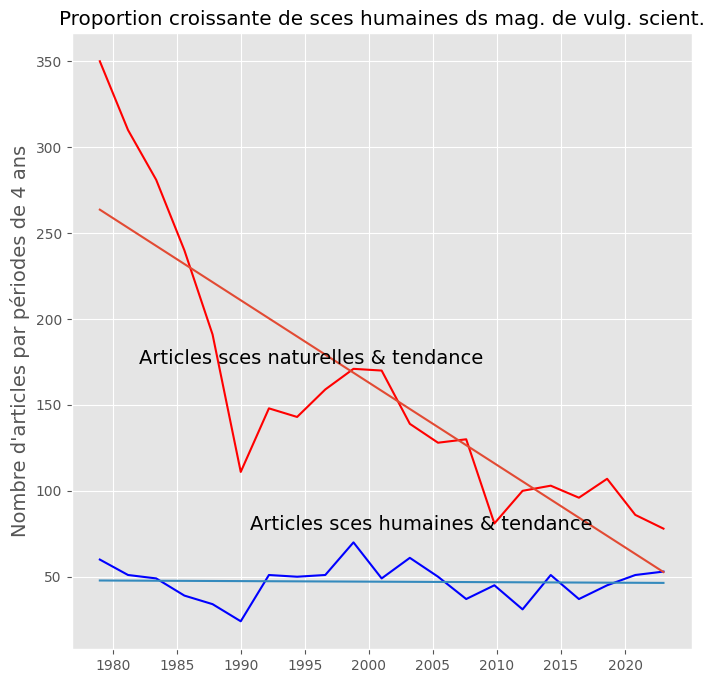

In [285]:
# création du premier graphique

from matplotlib.text import OffsetFrom

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

x = t1      # chronologie
y1 = y7     # total des articles 'naturelles'/2 années; total of natural sces articles per 2-year periods
y2 = y8     # total des articles 'humaines'/total of humanities articles per 2-year periods
y3 = r2     # ratio of the totals :totals of humanities articles divided by totals of natural sces articles

ax.set_title("Proportion croissante de sces humaines ds mag. de vulg. scient.")
ax.plot(x, y1, color="red", linewidth=1.5, linestyle="-")
ax.annotate("Articles sces humaines & tendance",
            xy=(180, 110), xycoords="figure points",
            fontsize=14)
ax.plot(x, y2, color="blue", linewidth=1.5, linestyle="-")
ax.annotate('Articles sces naturelles & tendance',
            xy=(100, 230), xycoords='figure points',
            fontsize=14)
# ax.plot(x, y3)
z = np.polyfit(x, y1, 1)
p = np.poly1d(z)
plt.plot(x, p(x))
u = np.polyfit(x, y2, 1)
v = np.poly1d(u)
plt.plot(x, v(x))

ax.set_ylabel("Nombre d'articles par périodes de 4 ans", fontsize=14)
ax.set_xticks([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020])
fig.savefig("Les humanités prennent plus de place en vulgarisation scientifique.png")

In [286]:
# échantillonnage par périodes de 4 années, pour une courbe plus douce
# sampling over 4-year periods to smooth the curve

hnS_4ans_ratio = (dh.resample("4Y").sum().humaines / dn.resample("4Y").sum().naturelles)
hnS_4ans_ratio.columns = ["ratio hum/nat 4a"]
hnS_4ans_ratio

date
1979-12-31 00:00:00+00:00    0.188889
1983-12-31 00:00:00+00:00    0.168212
1987-12-31 00:00:00+00:00    0.169002
1991-12-31 00:00:00+00:00    0.192483
1995-12-31 00:00:00+00:00    0.347148
1999-12-31 00:00:00+00:00    0.366727
2003-12-31 00:00:00+00:00    0.356084
2007-12-31 00:00:00+00:00    0.337403
2011-12-31 00:00:00+00:00    0.420110
2015-12-31 00:00:00+00:00    0.442261
2019-12-31 00:00:00+00:00    0.497513
2023-12-31 00:00:00+00:00    0.654321
Freq: 4A-DEC, dtype: float64

In [287]:
# unidimentionnalisation des ratios
# flattening of ratios

hnS_4ans_ratio
r = hnS_4ans_ratio.values
# print(type(r))
# print(r)
r1 = r.tolist()
print(type(r1))
print(len(r1))
print(r1)

<class 'list'>
12
[0.18888888888888888, 0.1682121212121212, 0.16900191938579653, 0.19248344370860926, 0.347147766323024, 0.36672727272727274, 0.356084142394822, 0.3374031007751938, 0.420110497237569, 0.4422613065326633, 0.49751295336787565, 0.654320987654321]


In [288]:
# création d'une chronologie qui deviendra l'axe vertical du second graphique.
# new timespan for the time axis

x = np.linspace(1979, 2023, 12)
x1 = x.tolist()
print(len(x1))
x1

12


[1979.0,
 1983.0,
 1987.0,
 1991.0,
 1995.0,
 1999.0,
 2003.0,
 2007.0,
 2011.0,
 2015.0,
 2019.0,
 2023.0]

In [289]:
# création du second graphique de l'évolution du ratio humaines/naturelles

from matplotlib.text import OffsetFrom

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')

import datetime

import scipy.stats as stats

# calcul du tau de Kendall et de la valeur p
# calculation of kendall's tau and p-value for the ratio values

tau, p_value = stats.kendalltau(x1, r1)
print('tau :', tau, 'et p_value :', p_value)

tau : 0.8181818181818181 et p_value : 4.4129288920955584e-05


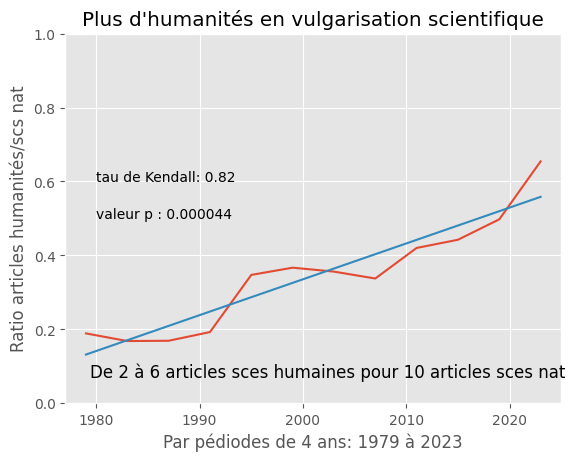

In [290]:


fig, ax = plt.subplots()
ax.plot(x1, r1)
ax.axis([1977, 2025, 0.0, 1.0])
m = np.polyfit(x1, r1, 1)
n = np.poly1d(m)
plt.plot(x1, n(x1))
ax.annotate('De 2 à 6 articles sces humaines pour 10 articles sces nat',
            xy=(65, 60), xycoords='figure points',
            fontsize=12)
ax.set(title = "Plus d'humanités en vulgarisation scientifique",
       ylabel = "Ratio articles humanités/scs nat",
       xlabel = "Par pédiodes de 4 ans: 1979 à 2023")
ax.text(1980, 0.6, "tau de Kendall: 0.82")
ax.text(1980, 0.5, "valeur p : 0.000044")
fig.savefig("Plus d'humanités.png")

In [291]:
# on élimine les signes de ponctuation et éléments inutiles, mais ne fait aucune différence
# stripping accents lowers precision of algorithm!


qs["mots_clefs"] = qs.mots_clefs.apply(lambda x: x.replace("\n", " "))

qs["mots_clefs"] = qs.mots_clefs.apply(lambda x: x.replace(",", ""))  # élimination des virgules, eliminating comas

qs["mots_clefs"] = qs.mots_clefs.apply(lambda x: x.replace("(", " "))   # " les parenthèses, eliminating parenthesis

qs["mots_clefs"] = qs.mots_clefs.apply(lambda x: x.replace(")", " "))   #  " les parenthèses, eliminating parenthesis

qs["mots_clefs"] = qs.mots_clefs.apply(lambda x: x.replace("--", ""))   #  élim. traits d'union, eliminating hyphens

qs["mots_clefs"] = qs.mots_clefs.apply(lambda x: x.replace("-", " "))   #  éelim. trait d'union, eliminating hyphen

qs["mots_clefs"] = qs.mots_clefs.apply(lambda x: x.replace(":", ""))   #  élim. les deux points, eliminating colons

qs["mots_clefs"] = qs.mots_clefs.apply(lambda x: x.replace("l'", ""))   #  éelim. l'article 'l'', eliminating 'l''

qs["mots_clefs"] = qs.mots_clefs.apply(lambda x: x.replace("*", ""))   # élim. astérisque,s eliminating astérisks

qs["mots_clefs"] = qs.mots_clefs.apply(lambda x: x.replace("+", ""))   # élim, des plus, eliminating +

qs["mots_clefs"] = qs.mots_clefs.apply(lambda x: x.replace("d'", ""))   # élim. préposition 'd'', eliminating 'd''

qs

,numéro,mots_clefs,catégorie
0,15/07/2023,World Mosquito Program Projet Moustiques Ve...,naturelles
1,15/07/2023,antibiorésistance,naturelles
2,15/07/2023,Limaces Québec Province Animaux et plantes...,naturelles
3,15/07/2023,Insectarium de Montréal. Grand Vivarium Papil...,naturelles
4,15/07/2023,Paillettes Aspect de environnement Produits d...,naturelles
...,...,...,...
4550,15/07/1979,Kung fu Physique,naturelles
4551,15/07/1979,Eau potable Toxicomanie Hydrologie Pollution d...,naturelles
4552,15/07/1979,Alcoolisme Cégeps Jeunesse québécoise Toxic...,naturelles
4553,15/07/1979,Psychiatrie Québec Province,naturelles
